### **MATH 4042U Project 1 - Image Compression**

In [45]:
# importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 


The object type of the imported image is: <class 'numpy.ndarray'>


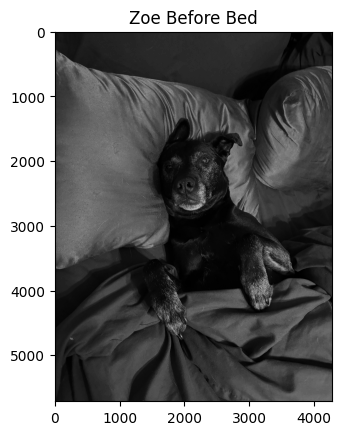

In [46]:
# importing my image of my cutie little dog, Zoe

img = cv2.imread('zoe.jpg', cv2.IMREAD_GRAYSCALE)

print('The object type of the imported image is:', type(img)) 

plt.imshow(img, cmap='gray')
plt.title('Zoe Before Bed')
plt.show()

In [47]:
# now converting to array

print(img)
print('The size of this array is', np.shape(img))
print('The rank of this matrix is', np.linalg.matrix_rank(img))

[[ 17  11  11 ...  32  33  35]
 [ 18  11  12 ...  31  32  34]
 [ 18  11  12 ...  31  32  33]
 ...
 [ 22  22  19 ... 108 113 110]
 [ 20  22  21 ... 117 122 119]
 [ 20  23  23 ... 122 125 123]]
The size of this array is (5712, 4284)
The rank of this matrix is 4284


In [48]:
# calculating SVD

U, S, Vt = np.linalg.svd(img, full_matrices=False)
U.shape, S.shape, Vt.shape

((5712, 4284), (4284,), (4284, 4284))

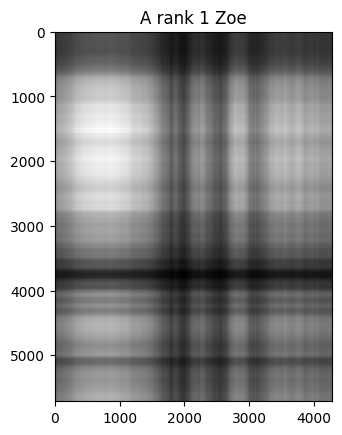

In [49]:
# rank 1 image of zoe

reconstructed_image = np.matrix(U[:,:1]) * np.diag(S[:1]) * np.matrix(Vt[:1,:]) 
plt.imshow(reconstructed_image, cmap='gray')
plt.title('A rank 1 Zoe')
plt.show()

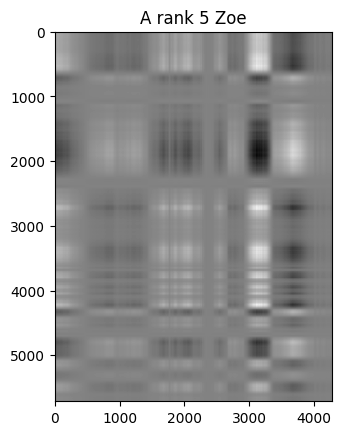

In [50]:
# rank 5 image of zoe

reconstructed_image = np.matrix(U[:,4:5]) * np.diag(S[4:5]) * np.matrix(Vt[4:5,:]) 
plt.imshow(reconstructed_image, cmap='gray')
plt.title('A rank 5 Zoe')
plt.show()

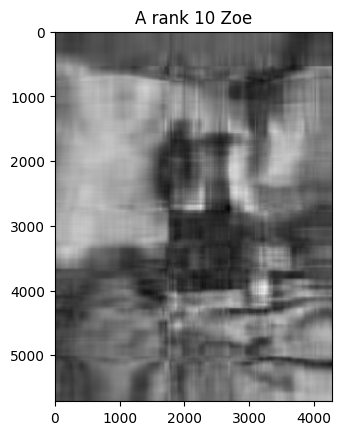

In [51]:
# rank 10 image of zoe

reconstructed_image = np.matrix(U[:,:10]) * np.diag(S[:10]) * np.matrix(Vt[:10,:]) 
plt.imshow(reconstructed_image, cmap='gray')
plt.title('A rank 10 Zoe')
plt.show()

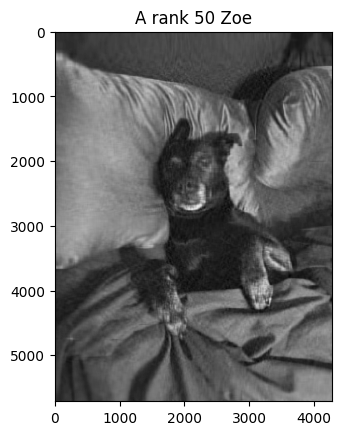

In [52]:
# rank 50 image of zoe

reconstructed_image = np.matrix(U[:,:50]) * np.diag(S[:50]) * np.matrix(Vt[:50,:]) 
plt.imshow(reconstructed_image, cmap='gray')
plt.title('A rank 50 Zoe')
plt.show()

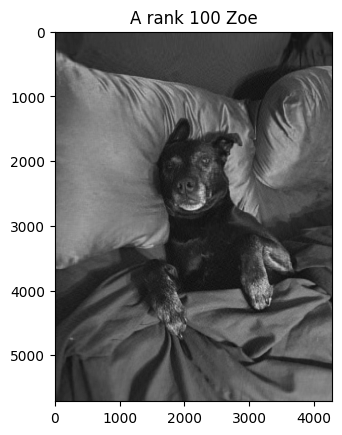

In [53]:
# rank 100 image of zoe

reconstructed_image = np.matrix(U[:,:100]) * np.diag(S[:100]) * np.matrix(Vt[:100,:]) 
plt.imshow(reconstructed_image, cmap='gray')
plt.title('A rank 100 Zoe')
plt.show()

#### **BONUS:** Make the nicest rank-one tartan pattern you can and why you think it is nice.


I am not sure if you wanted us to make the nicest rank-one tartan pattern based off an image or not, so I have created two that I think are very nice looking: the first is just from a patterned matrix and the second is using the image of Zoe. 

For the first tartan-pattern, I created a 300x300 patterned matrix, where each element is the product of sine functions applied to the row and column indices (`sin(x) * sin(y)`). Then, when I do the rank one approximation, instead of using grayscale (which is a bit boring), I wanted to make it pink, so I used the three colour channels (red, green, and blue). 

For the second tartan-pattern, I wanted to make it pink, but instead did SVD for each colour channel, then layered/stacked the three rank 1 images to make it pink. 

Personally, I think the first one looks a lot cooler because of the gradient affect that the sine function gives it, but I wanted to create two rank-one tartan patterns, one via patterned matrix, and another via image compression. 

[[ 0.          0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.          0.00111814  0.00223503 ... -0.01627527 -0.01724292
  -0.01819129]
 [ 0.          0.00223503  0.00446755 ... -0.03253233 -0.03446656
  -0.03636224]
 ...
 [-0.         -0.01627527 -0.03253233 ...  0.23689751  0.25098241
   0.2647866 ]
 [-0.         -0.01724292 -0.03446656 ...  0.25098241  0.26590474
   0.28052966]
 [-0.         -0.01819129 -0.03636224 ...  0.2647866   0.28052966
   0.29595897]]


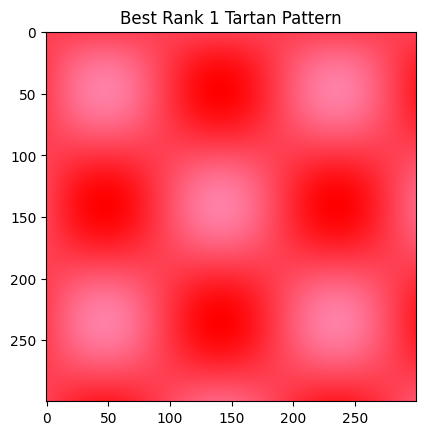

In [54]:
# create matrix with pattern in numbers
rows = 300
columns = 300
x = np.linspace(0,10,rows)
y = np.linspace(0,10,columns)
A = np.sin(x).reshape(-1,1) * np.sin(y).reshape(1,-1)
print(A)

# svd
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# rank 1 approx
rank_one_A = np.matrix(U[:,:1]) * np.diag(S[:1]) * np.matrix(Vt[:1,:]) 

# normalize values to [0,1] for colour mapping
rank_one_A = (rank_one_A - rank_one_A.min()) / (rank_one_A.max() - rank_one_A.min())

# making it pink
pink_A = np.zeros((rows, columns, 3)) # empty 3D array for RGB
pink_A[:, :, 0] = 1.0  # red channel 100%
pink_A[:, :, 1] = 0.5 * rank_one_A  # reduce green channel (50%) for pink 
pink_A[:, :, 2] = 0.65 * rank_one_A  # reduce blue channel (65%) for pink

# display
plt.imshow(pink_A)
plt.title("Best Rank 1 Tartan Pattern")
plt.show()


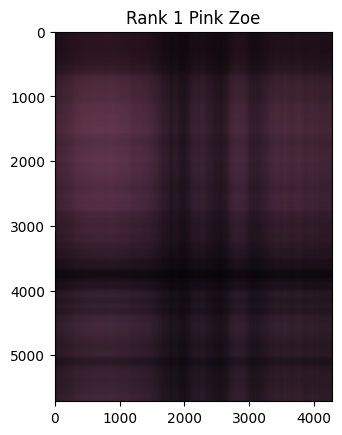

In [55]:
# Load image
colour_image = cv2.imread('zoe.jpg')

# Convert BGR to RGB (since OpenCV loads images in BGR format)
colour_image = cv2.cvtColor(colour_image, cv2.COLOR_BGR2RGB)

# Split into R, G, B channels
B, G, R = cv2.split(colour_image)

# SVD for each channel
U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

n = 1  # rank 1 approx

# getting the RGB rank 1 approx's
R_compressed = (U_R[:, :n] @ np.diag(S_R[:n]) @ Vt_R[:n, :])
G_compressed = (U_G[:, :n] @ np.diag(S_G[:n]) @ Vt_G[:n, :])
B_compressed = (U_B[:, :n] @ np.diag(S_B[:n]) @ Vt_B[:n, :])

# reducing green and blue
G_compressed *= 0.5  
B_compressed *= 0.65

# stack the red, green, and blue colour channels to get pink
pink_image = np.dstack((R_compressed, G_compressed, B_compressed))

# normalize for proper display
pink_image = np.clip(pink_image / 255.0, 0, 1)

# display
plt.imshow(pink_image)
plt.title('Rank 1 Pink Zoe')
plt.show()
